### Analysis of 311 NYC service request


#### Problem Statement:
NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

#### Problem Objective:
Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.

#### Domain
Customer Service

#### Analysis Tasks to be performed:
(Perform a service request data analysis of New York City 311 calls) 
1.	Import a 311 NYC service request.
2.	Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
3.	Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
4.	Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
5.	Perform a statistical test for the following:

#### Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’. 
a-Whether the average response time across complaint types is similar or not (overall)
b-Are the type of complaint or service requested and location related?

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
import calendar

## 1. Import dataset

In [1]:
# Import the uploaded dataset
dataset_ServiceRequest = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory=False)

In [3]:
#View the dataset shape
dataset_ServiceRequest.shape
# 300698 Rows with 53 columns

(300698, 53)

In [4]:
# View the first 5 rows of the dataset
dataset_ServiceRequest.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
# View the data types of the dataset
dataset_ServiceRequest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [6]:
# #View the data statistics
dataset_ServiceRequest.describe(include=object)

# From the result below, we can make a few preliminary observations.
# We can see that in 'Agency' column, NYPD is the most occuring value meaning that all of the complaints in the dataset are being routed to them. 
# Also,'Blocked Driveway' is the highest recorded type of complaint in the dataset.
# To understand the relationships between the variables, the dataset must be further investigated with other techniques

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,Cross Street 1,...,School State,School Zip,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Location
count,300698,298534,300698,300698,300698,294784,300567,256288,256288,251419,...,300698,300697,300698,243,243,213,213,1,2,297158
unique,259493,237165,1,3,24,45,18,107652,7320,5982,...,2,1,1,29,34,2,160,1,2,126048
top,07-11-15 23:04,11-08-15 7:34,NYPD,New York City Police Department,Blocked Driveway,Loud Music/Party,Street/Sidewalk,1207 BEACH AVENUE,BROADWAY,BROADWAY,...,Unspecified,Unspecified,N,FDR Dr,East/Queens Bound,Roadway,East 96th St (Exit 14) - Triborough Br (Exit 17),Manhattan Bound,St. George Terminal (Staten Island),"(40.83036235589997, -73.86602154214397)"
freq,9,24,300698,300690,77044,61430,249299,904,3237,4338,...,300697,300697,300698,33,21,162,6,1,1,902


In [7]:
#to find percentage so that columns with 50 percent of missing data can be dropped 
dataset_ServiceRequest.isnull().sum()/dataset_ServiceRequest.shape[0] 

Unique Key                        0.000000
Created Date                      0.000000
Closed Date                       0.007197
Agency                            0.000000
Agency Name                       0.000000
Complaint Type                    0.000000
Descriptor                        0.019668
Location Type                     0.000436
Incident Zip                      0.008696
Incident Address                  0.147690
Street Name                       0.147690
Cross Street 1                    0.163882
Cross Street 2                    0.165545
Intersection Street 1             0.854146
Intersection Street 2             0.855796
Address Type                      0.009362
City                              0.008693
Landmark                          0.998839
Facility Type                     0.007220
Status                            0.000000
Due Date                          0.000010
Resolution Description            0.000000
Resolution Action Updated Date    0.007273
Community B

In [8]:
# To view all the columns in the dataset for an overall view
pd.set_option('display.max_columns',None)
dataset_ServiceRequest.sample(4)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
153091,31280043,08-10-15 20:01,08-10-15 23:05,NYPD,New York City Police Department,Illegal Parking,Unauthorized Bus Layover,Street/Sidewalk,10002.0,2 PIKE STREET,PIKE STREET,ALLEN STREET,EAST BROADWAY,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08-11-15 4:01,The Police Department responded to the complai...,08-10-15 23:05,03 MANHATTAN,MANHATTAN,986241.0,199510.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714285,-73.992818,"(40.7142853806812, -73.9928180150992)"
224050,30813276,06-10-15 7:20,06-10-15 12:24,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11385.0,75-16 EDSALL AVENUE,EDSALL AVENUE,75 STREET,76 STREET,NaN,NaN,ADDRESS,RIDGEWOOD,NaN,Precinct,Closed,06-10-15 15:20,The Police Department responded to the complai...,06-10-15 12:24,05 QUEENS,QUEENS,1018963.0,196763.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.706678,-73.874797,"(40.70667765042193, -73.87479664793011)"
167082,31190328,07/29/2015 08:15:21 AM,07/29/2015 03:13:24 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11229.0,1802 EAST 22 STREET,EAST 22 STREET,QUENTIN ROAD,AVENUE R,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,07/29/2015 04:15:21 PM,The Police Department responded and upon arriv...,07/29/2015 03:13:24 PM,15 BROOKLYN,BROOKLYN,997864.0,160637.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.607577,-73.950970,"(40.60757735080347, -73.95096973091675)"
78228,31764596,10/16/2015 06:09:12 AM,10/16/2015 07:46:31 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,10472.0,NaN,NaN,NaN,NaN,CLOSE AVENUE,WESTCHESTER AVENUE,INTERSECTION,BRONX,NaN,Precinct,Closed,10/16/2015 02:09:12 PM,The Police Department responded to the complai...,10/16/2015 07:46:31 AM,09 BRONX,BRONX,1016643.0,241072.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.828303,-73.882951,"(40.8283030307376, -73.8829509004282)"


##### For verification purpose, lets check a few columns which has less than 50 percent of data

In [9]:
# "School or Citywide Complaint" column has about 1.000000 of missing data
dataset_ServiceRequest['School or Citywide Complaint'].value_counts()

Series([], Name: School or Citywide Complaint, dtype: int64)

In [10]:
# "Road Ramp" column has about 0.999292 of missing data
dataset_ServiceRequest['Road Ramp'].value_counts()

Roadway    162
Ramp        51
Name: Road Ramp, dtype: int64

In [11]:
## We can drop the following columns as there is insufficient data(data less than 50 percent)
dataset_SRnew = dataset_ServiceRequest.drop(['Intersection Street 1','Intersection Street 2','Landmark','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name'],axis=1)

In [12]:
dataset_SRnew.sample(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
139387,31376557,08/23/2015 08:56:16 AM,08/23/2015 10:04:25 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11208.0,123 DOSCHER STREET,DOSCHER STREET,BELMONT AVENUE,SUTTER AVENUE,ADDRESS,BROOKLYN,Precinct,Closed,08/23/2015 04:56:16 PM,The Police Department issued a summons in resp...,08/23/2015 10:04:25 AM,05 BROOKLYN,BROOKLYN,1019676.0,184785.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.673798,-73.872288,"(40.673798008138675, -73.87228797954565)"
130551,31422571,08/30/2015 09:07:08 PM,08/30/2015 09:59:32 PM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11357.0,150-31 12 AVENUE,12 AVENUE,150 STREET,CLINTONVILLE STREET,ADDRESS,WHITESTONE,Precinct,Closed,08/31/2015 05:07:08 AM,The Police Department reviewed your complaint ...,08/30/2015 09:59:32 PM,07 QUEENS,QUEENS,1035828.0,227490.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.790933,-73.813732,"(40.79093309368407, -73.81373221179997)"
45308,31993235,11/15/2015 11:14:10 PM,11/16/2015 12:57:41 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11374.0,88-11 63 DRIVE,63 DRIVE,CARLTON STREET,BOURTON STREET,ADDRESS,REGO PARK,Precinct,Closed,11/16/2015 07:14:10 AM,The Police Department responded and upon arriv...,11/16/2015 12:57:41 AM,06 QUEENS,QUEENS,1021386.0,203221.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.724393,-73.866022,"(40.72439345715963, -73.86602172368109)"
139584,31372920,08/23/2015 02:19:58 AM,08/23/2015 03:34:35 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10452.0,1214 NELSON AVENUE,NELSON AVENUE,WEST 167 STREET,WEST 168 STREET,ADDRESS,BRONX,Precinct,Closed,08/23/2015 10:19:58 AM,The Police Department responded to the complai...,08/23/2015 03:34:35 PM,04 BRONX,BRONX,1004929.0,244530.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.837829,-73.925268,"(40.83782943529668, -73.92526766600092)"
73326,31801250,10/20/2015 09:02:54 PM,10/20/2015 09:15:58 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10472.0,NaN,NaN,NaN,NaN,INTERSECTION,BRONX,Precinct,Closed,10/21/2015 05:02:54 AM,The Police Department responded to the complai...,10/20/2015 09:15:14 PM,09 BRONX,BRONX,1021357.0,241672.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.829931,-73.865914,"(40.829931310404646, -73.86591400513787)"


In [13]:
# More data cleaning - To drop columns with unspecified/NaN values.
for col in dataset_SRnew.columns:
   print( dataset_SRnew[col].value_counts(normalize=True))

32310363    0.000003
30964902    0.000003
30963768    0.000003
30961544    0.000003
30964777    0.000003
              ...   
31611925    0.000003
31615926    0.000003
31612695    0.000003
31617117    0.000003
30281825    0.000003
Name: Unique Key, Length: 300698, dtype: float64
07-11-15 23:04            0.000030
11-06-15 23:34            0.000030
06-06-15 22:23            0.000030
10-09-15 23:56            0.000027
11-01-15 22:12            0.000027
                            ...   
09/22/2015 05:52:17 PM    0.000003
09/22/2015 05:50:43 PM    0.000003
09/22/2015 05:49:55 PM    0.000003
09/22/2015 05:49:47 PM    0.000003
03/29/2015 12:33:01 AM    0.000003
Name: Created Date, Length: 259493, dtype: float64
11-08-15 7:34             0.000080
10-11-15 7:03             0.000074
12-08-15 7:44             0.000060
05-10-15 7:01             0.000060
12-07-15 23:17            0.000057
                            ...   
09/21/2015 11:03:55 AM    0.000003
09/21/2015 08:52:27 AM    0.000003
09/2

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                                                                                                                                                                                                                                                                                                                                               0.300933
The Police Department responded to the complaint and took action to fix the condition.                                                                                                                                                                                                                                                                                                                                                                                                                   

Unspecified    0.999997
Q001           0.000003
Name: School Number, dtype: float64
Unspecified    1.0
Name: School Region, dtype: float64
Unspecified    1.0
Name: School Code, dtype: float64
Unspecified    0.999997
7182176034     0.000003
Name: School Phone Number, dtype: float64
Unspecified                                     0.999997
Grand Central Parkway, near the soccer field    0.000003
Name: School Address, dtype: float64
Unspecified    0.999997
QUEENS         0.000003
Name: School City, dtype: float64
Unspecified    0.999997
NY             0.000003
Name: School State, dtype: float64
Unspecified    1.0
Name: School Zip, dtype: float64
N    1.0
Name: School Not Found, dtype: float64
40.830362    0.003035
40.721959    0.001699
40.703819    0.001615
40.647132    0.001218
40.708726    0.001148
               ...   
40.847772    0.000003
40.754813    0.000003
40.726701    0.000003
40.774942    0.000003
40.716053    0.000003
Name: Latitude, Length: 125122, dtype: float64
-73.866022   

In [14]:
dataset_SRnew.iloc[:,24:37]

,Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude
0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682
1,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945
2,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325
3,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994
4,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN
300694,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.694077
300695,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.699590
300696,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.837708


In [15]:
# Drop columns with unspecified data
data_final= dataset_SRnew.drop(['Park Facility Name','School Name','School Number','School Region','School Code','School Phone Number','School Address','School City','School State','School Zip','School Not Found','Address Type'], axis=1)
data_final.sample(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
78195,31763756,10/16/2015 07:09:05 AM,10/16/2015 01:30:19 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11103.0,32-52 41 STREET,41 STREET,BROADWAY,34 AVENUE,Astoria,Precinct,Closed,10/16/2015 03:09:05 PM,The Police Department responded to the complai...,10/16/2015 01:30:20 PM,01 QUEENS,QUEENS,1006643.0,215234.0,QUEENS,40.757416,-73.919171,"(40.75741574540848, -73.91917109670187)"


In [16]:
# There were a few repetitions in the "City" column (duplicates of cities, mix-up between uppercase and lowercase).
# The following is to sync the duplicated data.
data_final['City'] = data_final['City'].str.upper()

In [17]:
#Drop more columns which are not required in our analysis:
data_final = data_final.drop(['Agency Name','Incident Address','Cross Street 1','Cross Street 2','Street Name','Facility Type','Status','Due Date','Resolution Action Updated Date','Community Board','X Coordinate (State Plane)','Y Coordinate (State Plane)','Park Borough'], axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              300698 non-null  int64  
 1   Created Date            300698 non-null  object 
 2   Closed Date             298534 non-null  object 
 3   Agency                  300698 non-null  object 
 4   Complaint Type          300698 non-null  object 
 5   Descriptor              294784 non-null  object 
 6   Location Type           300567 non-null  object 
 7   Incident Zip            298083 non-null  float64
 8   City                    298084 non-null  object 
 9   Resolution Description  300698 non-null  object 
 10  Borough                 300698 non-null  object 
 11  Latitude                297158 non-null  float64
 12  Longitude               297158 non-null  float64
 13  Location                297158 non-null  object 
dtypes: float64(3), int64

In [18]:
# Dropping all null objects for our statistical analysis later on.
data_final.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
Location                  3540
dtype: int64

In [19]:
data_final= data_final.dropna()
print(data_final)
#data_final = data_final.drop([161610,192974,283132])

        Unique Key            Created Date             Closed Date Agency  \
0         32310363  12/31/2015 11:59:45 PM           01-01-16 0:55   NYPD   
1         32309934  12/31/2015 11:59:44 PM           01-01-16 1:26   NYPD   
2         32309159  12/31/2015 11:59:29 PM           01-01-16 4:51   NYPD   
3         32305098  12/31/2015 11:57:46 PM           01-01-16 7:43   NYPD   
4         32306529  12/31/2015 11:56:58 PM           01-01-16 3:24   NYPD   
...            ...                     ...                     ...    ...   
300692    30281370  03/29/2015 12:34:32 AM  03/29/2015 01:13:01 AM   NYPD   
300694    30281230  03/29/2015 12:33:28 AM  03/29/2015 02:33:59 AM   NYPD   
300695    30283424  03/29/2015 12:33:03 AM  03/29/2015 03:40:20 AM   NYPD   
300696    30280004  03/29/2015 12:33:02 AM  03/29/2015 04:38:35 AM   NYPD   
300697    30281825  03/29/2015 12:33:01 AM  03/29/2015 04:41:50 AM   NYPD   

                 Complaint Type                    Descriptor  \
0       No

In [20]:
data_final.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
Location                  0
dtype: int64

In [21]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291107 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              291107 non-null  int64  
 1   Created Date            291107 non-null  object 
 2   Closed Date             291107 non-null  object 
 3   Agency                  291107 non-null  object 
 4   Complaint Type          291107 non-null  object 
 5   Descriptor              291107 non-null  object 
 6   Location Type           291107 non-null  object 
 7   Incident Zip            291107 non-null  float64
 8   City                    291107 non-null  object 
 9   Resolution Description  291107 non-null  object 
 10  Borough                 291107 non-null  object 
 11  Latitude                291107 non-null  float64
 12  Longitude               291107 non-null  float64
 13  Location                291107 non-null  object 
dtypes: float64(3), int64

Our final cleaned data size : 291107 entries, 14 columns, 33.3mb
Originally: 300698 entries, 53 columns, 121.6mb

## 2. Convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

In [22]:
# To check data type before conversion:
data_final.get(['Created Date','Closed Date']).dtypes

Created Date    object
Closed Date     object
dtype: object

In [23]:
# Convert the columns 'Created Date' and 'Closed Date' to datetime datatype
data_final[['Created Date','Closed Date']]=data_final[['Created Date','Closed Date']].apply(pd.to_datetime)

In [24]:
# Create a new column 'Request_Closing_Time'
data_final['Request_Closing_Time'] = data_final['Closed Date'] - data_final['Created Date']

In [25]:
# For verification:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291107 entries, 0 to 300697
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              291107 non-null  int64          
 1   Created Date            291107 non-null  datetime64[ns] 
 2   Closed Date             291107 non-null  datetime64[ns] 
 3   Agency                  291107 non-null  object         
 4   Complaint Type          291107 non-null  object         
 5   Descriptor              291107 non-null  object         
 6   Location Type           291107 non-null  object         
 7   Incident Zip            291107 non-null  float64        
 8   City                    291107 non-null  object         
 9   Resolution Description  291107 non-null  object         
 10  Borough                 291107 non-null  object         
 11  Latitude                291107 non-null  float64        
 12  Longitude       

## 3.Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

#### The following patterns will be analysed in this section:
    a. Types of complaints (Observe the different precentages of each type of complaint, visualize in bar charts)
    b. Graph based highest frequency of complaint type against location
    c. Observation on City and Sum of Complaint Types for each City
    d. Find aggregates based on 'City', 'Complaint Type' and 'Request Closing_Time'
    e. Segregrating total no of incidents according to days.
    f. Plotting "Request_Closing_Time"

###### a.  Types of complaints (Observe the different precentages of each type of complaint, visualize in bar charts)

In [26]:
no_complaints = data_final['Complaint Type'].value_counts()

In [27]:
no_complaints = no_complaints.to_frame().reset_index()

In [28]:
no_complaints =no_complaints.rename(columns= {'Complaint Type': 'Frequency','index':'Type of Complaint'})
no_complaints

,Type of Complaint,Frequency
0,Blocked Driveway,76676
1,Illegal Parking,74021
2,Noise - Street/Sidewalk,47747
3,Noise - Commercial,35144
4,Derelict Vehicle,17506
5,Noise - Vehicle,16868
6,Animal Abuse,7744
7,Traffic,4466
8,Noise - Park,3927
9,Vending,3773


In [29]:
no_complaints['Percentage']=np.round((no_complaints.Frequency/no_complaints.Frequency.sum())*100,decimals=2)
no_complaints = no_complaints.nlargest(10,'Percentage')
no_complaints

,Type of Complaint,Frequency,Percentage
0,Blocked Driveway,76676,26.34
1,Illegal Parking,74021,25.43
2,Noise - Street/Sidewalk,47747,16.40
3,Noise - Commercial,35144,12.07
4,Derelict Vehicle,17506,6.01
5,Noise - Vehicle,16868,5.79
6,Animal Abuse,7744,2.66
7,Traffic,4466,1.53
8,Noise - Park,3927,1.35
9,Vending,3773,1.30


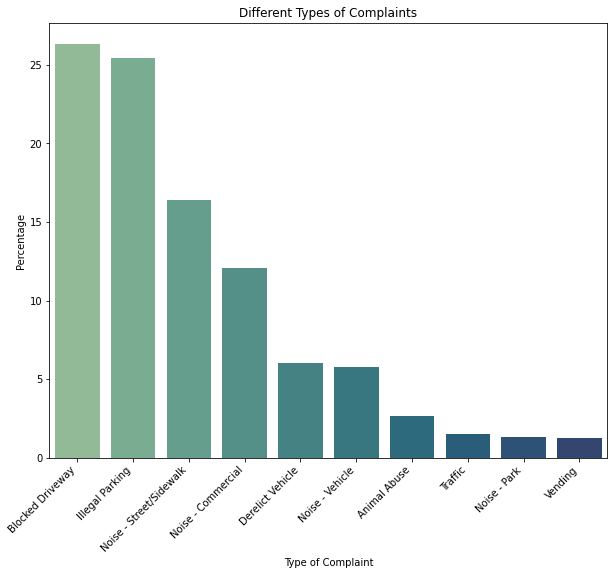

In [30]:
# Represent the data above in bar chat- Visualization

plt.figure(figsize=(10,8))
bar_graph = sns.barplot(x=no_complaints['Type of Complaint'],y=no_complaints.Percentage,data=no_complaints,palette = "crest")
bar_graph.set_xticklabels(bar_graph.get_xticklabels(), rotation=45, ha="right")
plt.title('Different Types of Complaints')
plt.show()

The above chart shows the top ten complaints. It is obvious that "Blocked Driveway" is the most reported type of complaint followed by "Illegal Parking".

##### b. Observation on types of complaint based on cities

In [31]:
complaint_city = pd.DataFrame({'Frequency':data_final.groupby(['Complaint Type','City']).size()}).reset_index()
complaint_city

,Complaint Type,City,Frequency
0,Animal Abuse,ARVERNE,38
1,Animal Abuse,ASTORIA,125
2,Animal Abuse,BAYSIDE,37
3,Animal Abuse,BELLEROSE,7
4,Animal Abuse,BREEZY POINT,2
...,...,...,...
595,Vending,STATEN ISLAND,25
596,Vending,SUNNYSIDE,15
597,Vending,WHITESTONE,1
598,Vending,WOODHAVEN,6


In [32]:
blocked_driveway_data=complaint_city.groupby('Complaint Type').get_group('Blocked Driveway')
blocked_driveway_data.rename(columns={'Count':'Frequency'})
blocked_driveway_data

,Complaint Type,City,Frequency
46,Blocked Driveway,ARVERNE,35
47,Blocked Driveway,ASTORIA,2734
48,Blocked Driveway,BAYSIDE,376
49,Blocked Driveway,BELLEROSE,95
50,Blocked Driveway,BREEZY POINT,3
51,Blocked Driveway,BRONX,12740
52,Blocked Driveway,BROOKLYN,28119
53,Blocked Driveway,CAMBRIA HEIGHTS,147
54,Blocked Driveway,COLLEGE POINT,434
55,Blocked Driveway,CORONA,2761


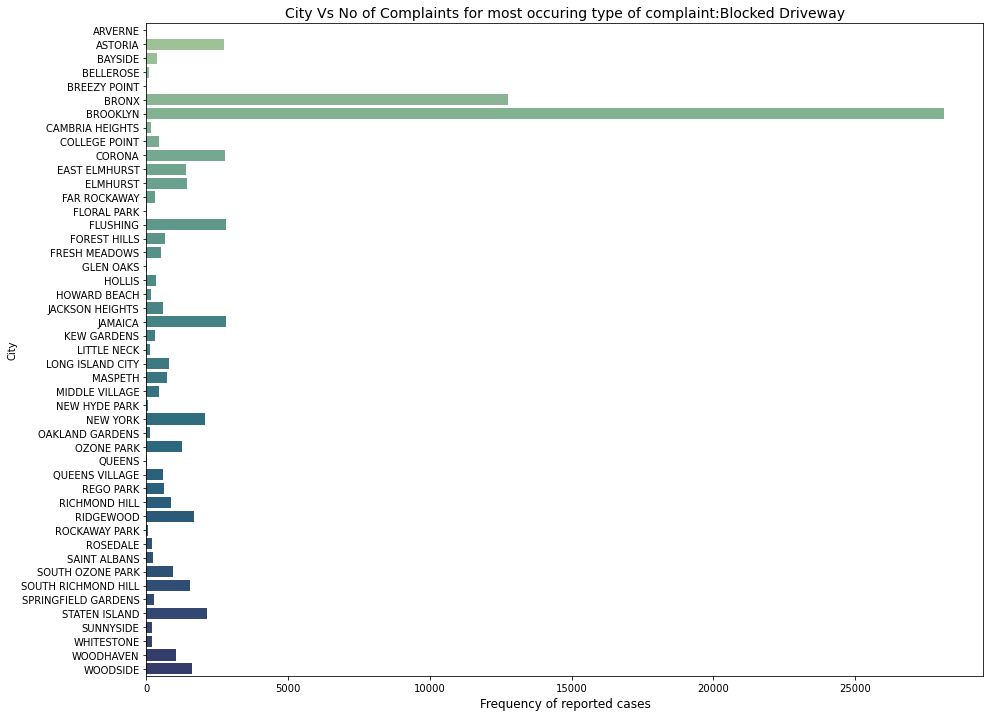

In [33]:
plt.figure(figsize=(15,12))
ax = sns.barplot(x=blocked_driveway_data['Frequency'],y=blocked_driveway_data['City'],data=blocked_driveway_data,palette = "crest")
plt.title('City Vs No of Complaints for most occuring type of complaint:Blocked Driveway',fontsize=14)
plt.ylabel('City')
plt.xlabel('Frequency of reported cases', fontsize=12)
plt.show()

##### b. Graph based highest frequency of complaint type against location

In [34]:
Blocked_driveway_Brook = data_final[data_final['Complaint Type'] == 'Blocked Driveway']

(-74.2806446056075, -73.6731468343925, 40.482794736500004, 40.9326310135)

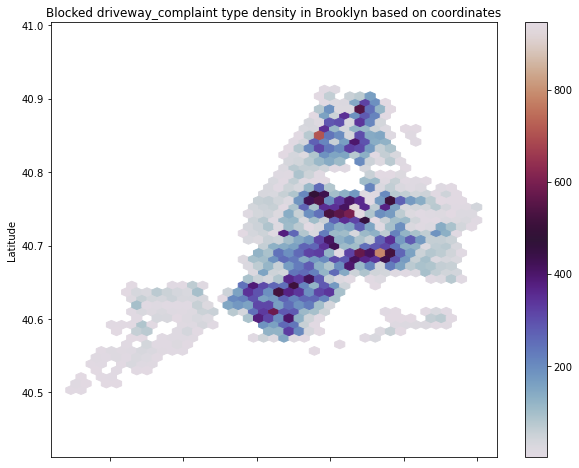

In [65]:
Blocked_driveway_Brook.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,title = 'Blocked driveway_complaint type density in Brooklyn based on coordinates',colormap='twilight', mincnt=1, figsize=(10,8)).axis('equal')

##### c. Observation on City and Sum of Complaint Types for each City

In [36]:
citywise_data = data_final.groupby(['City','Complaint Type']).size()
citywise_data = citywise_data.to_frame().reset_index()
citywise_data.rename(columns={citywise_data.columns[2]:'Frequency'},inplace=True)
#citywise_data['Percentage']=np.round((citywise_data['City'].Frequency/citywise_data['City'].Frequency.sum())*100,decimals=2)
citywise_data = citywise_data[(citywise_data.Frequency) >= 1000]
citywise_data

,City,Complaint Type,Frequency
14,ASTORIA,Blocked Driveway,2734
19,ASTORIA,Illegal Parking,1278
20,ASTORIA,Noise - Commercial,1543
63,BRONX,Animal Abuse,1412
64,BRONX,Blocked Driveway,12740
65,BRONX,Derelict Vehicle,1948
69,BRONX,Illegal Parking,7829
70,BRONX,Noise - Commercial,2431
73,BRONX,Noise - Street/Sidewalk,8865
74,BRONX,Noise - Vehicle,3385


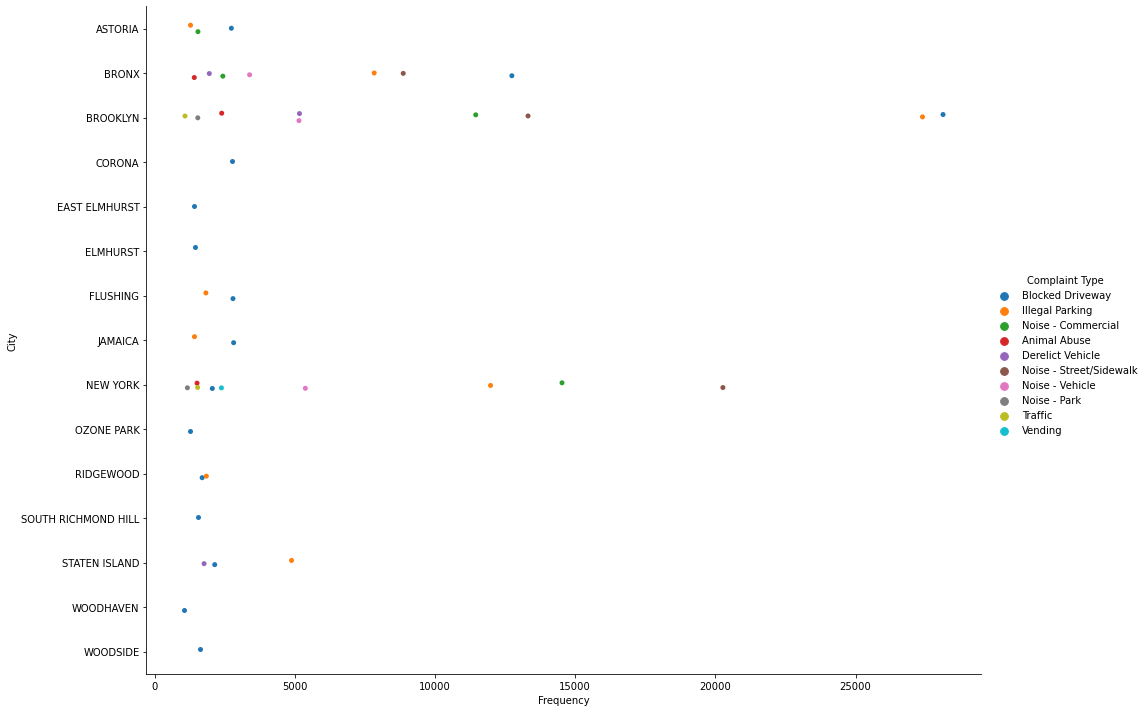

In [37]:
sns.catplot(x="Frequency", y="City",hue='Complaint Type',data=citywise_data,height=10, aspect=11.7/8.27 )

In [38]:
citywise_data_per =np.around((citywise_data['City'].value_counts()*100) / citywise_data['City'].value_counts().sum(), decimals=2)
citywise_data_per = citywise_data_per.to_frame().reset_index()
citywise_data_per = citywise_data_per.rename(columns={citywise_data_per.columns[1]:'Percentage', citywise_data_per.columns[0]:'City'})
citywise_data_per

,City,Percentage
0,BROOKLYN,20.45
1,NEW YORK,20.45
2,BRONX,15.91
3,ASTORIA,6.82
4,STATEN ISLAND,6.82
5,FLUSHING,4.55
6,JAMAICA,4.55
7,RIDGEWOOD,4.55
8,CORONA,2.27
9,EAST ELMHURST,2.27


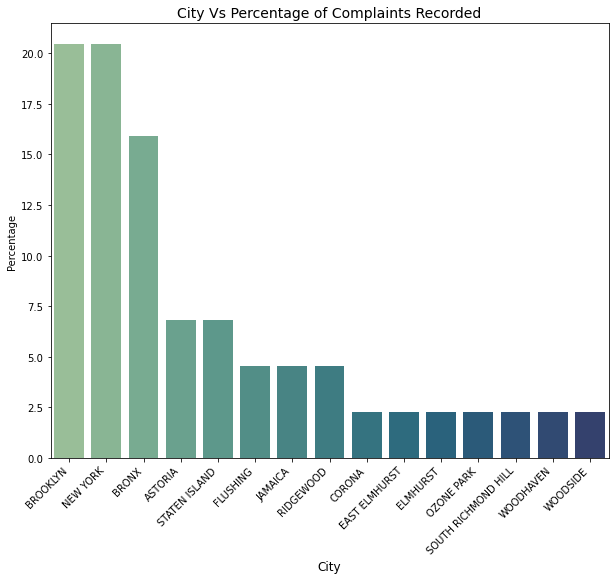

In [66]:
plt.figure(figsize=(10,8))
bar_graph2 = sns.barplot(x=citywise_data_per['City'],y=citywise_data_per['Percentage'],data=citywise_data_per,palette = "crest")
plt.title('City Vs Percentage of Complaints Recorded',fontsize=14 )
plt.ylabel('Percentage')
plt.xlabel('City', fontsize=12)
bar_graph2.set_xticklabels(bar_graph2.get_xticklabels(), rotation=45, ha="right")
plt.show()

##### d.  Find aggregates based on 'City', 'Complaint Type' and 'Request Closing_Time'

In [40]:
df=data_final[['City','Complaint Type','Request_Closing_Time']]
#To drop NaN Values so that further analysis can be done.
Aggregrates_data = df.dropna(subset = ['City','Complaint Type','Request_Closing_Time'])
Aggregrates_data['Request_Closing_Time_inhrs'] = np.around((Aggregrates_data['Request_Closing_Time'].dt.total_seconds() / 3600),decimals=2)
Aggregrates_data.head()

,City,Complaint Type,Request_Closing_Time,Request_Closing_Time_inhrs
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:15,0.92
1,ASTORIA,Blocked Driveway,0 days 01:26:16,1.44
2,BRONX,Blocked Driveway,0 days 04:51:31,4.86
3,BRONX,Illegal Parking,0 days 07:45:14,7.75
4,ELMHURST,Illegal Parking,0 days 03:27:02,3.45


In [41]:
df_groupby = (Aggregrates_data.groupby(['Complaint Type']).agg({'Request_Closing_Time_inhrs': ['mean','std','median']})).round(2)
df_groupby = df_groupby.dropna()

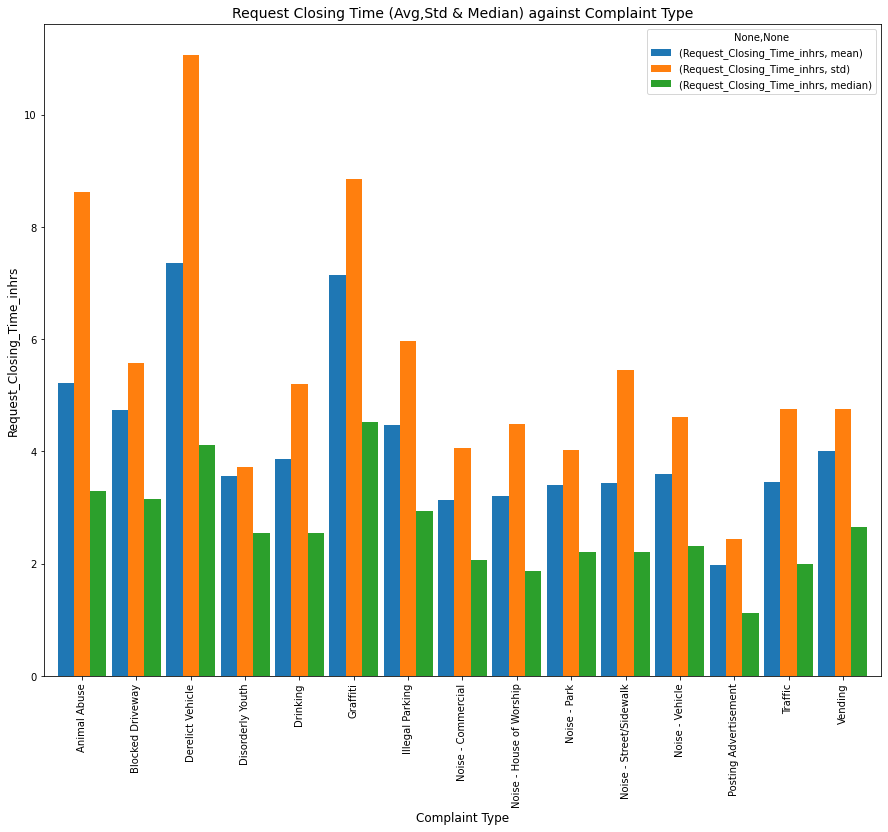

In [67]:
ax = df_groupby.plot.bar(figsize=(15,12), width=0.9)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Request Closing Time (Avg,Std & Median) against Complaint Type',fontsize=14 )
plt.ylabel('Request_Closing_Time_inhrs', fontsize=12)
plt.xlabel('Complaint Type', fontsize=12)
plt.xticks(rotation=90)
plt.show()

##### e. Segregrating total no of incidents according to days.

In [43]:
data_final['Created Date'].head()

0   2015-12-31 23:59:45
1   2015-12-31 23:59:44
2   2015-12-31 23:59:29
3   2015-12-31 23:57:46
4   2015-12-31 23:56:58
Name: Created Date, dtype: datetime64[ns]

In [44]:
wd_counts = data_final['Created Date'].dt.day_name().value_counts()
wd_counts

Saturday     46402
Sunday       46333
Friday       42697
Thursday     40026
Monday       39154
Wednesday    38426
Tuesday      38069
Name: Created Date, dtype: int64

<AxesSubplot:title={'center':'311 NYC Service Requests on Days in 2015  '}>

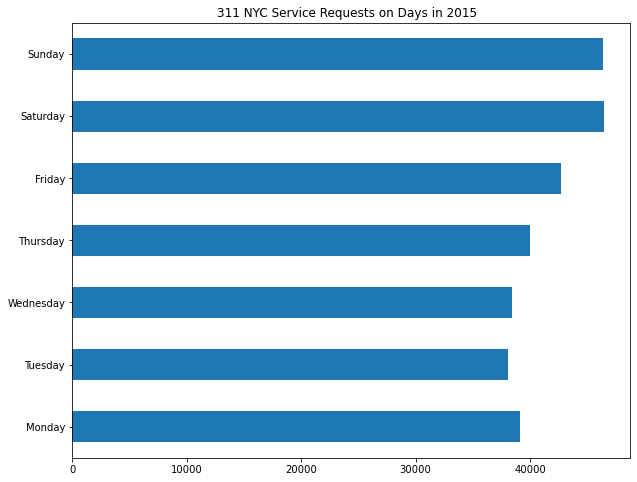

In [68]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
title = '311 NYC Service Requests on Days in 2015  '
wd_counts.reindex(days).plot(kind='barh',figsize=(10,8),title=title)

##### f. Plotting "Request_Closing_Time"

In [46]:
data_final['Request_Closing_Hours'] = np.around((data_final['Request_Closing_Time'].dt.total_seconds() / 3600), decimals=2)
data_final[['Request_Closing_Time','Request_Closing_Hours']].head()

,Request_Closing_Time,Request_Closing_Hours
0,0 days 00:55:15,0.92
1,0 days 01:26:16,1.44
2,0 days 04:51:31,4.86
3,0 days 07:45:14,7.75
4,0 days 03:27:02,3.45


In [47]:
mean = data_final['Request_Closing_Hours'].mean()
std = data_final['Request_Closing_Hours'].std()

print('Mean: ',mean)
print('Std: ',std)

Mean:  4.3089371605629765
Std:  6.06264598389193


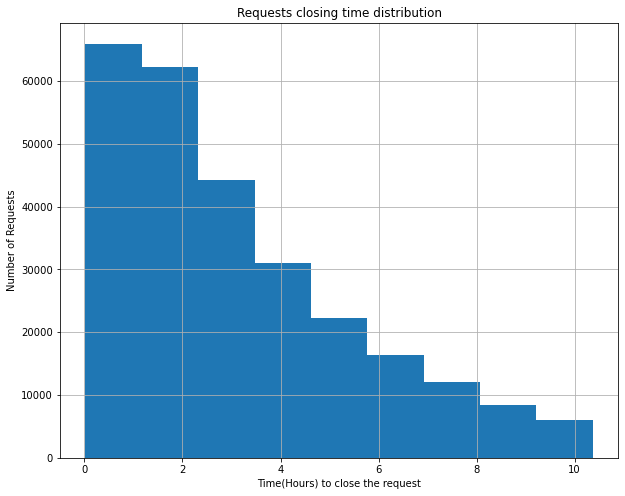

In [69]:
plot_data = data_final[ ((data_final['Request_Closing_Hours']-mean)/std) < 1]  #z-value
plt.figure(figsize=(10,8))
plot_data['Request_Closing_Hours'].hist(bins=9)
plt.xlabel('Time(Hours) to close the request')
plt.ylabel('Number of Requests')
plt.title('Requests closing time distribution')
plt.show()

We can observe that the average time NYPD took to solve a complaint case ranges from 2 to 4 hours.

## 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [49]:
df_groupby_new = ((Aggregrates_data.groupby(['City','Complaint Type']).agg({'Request_Closing_Time_inhrs': ['mean']})).round(2)).reset_index()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_groupby_new

,City,Complaint Type,Request_Closing_Time_inhrs
,,,mean
0,ARVERNE,Animal Abuse,2.15
1,ARVERNE,Blocked Driveway,2.53
2,ARVERNE,Derelict Vehicle,2.97
3,ARVERNE,Disorderly Youth,3.60
4,ARVERNE,Drinking,0.24
5,ARVERNE,Graffiti,1.53
6,ARVERNE,Illegal Parking,2.32
7,ARVERNE,Noise - Commercial,2.28
8,ARVERNE,Noise - House of Worship,1.56


## 5. Perform a statistical test for the following:

Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’. 
- Whether the average response time across complaint types is similar or not (overall)
- Are the type of complaint or service requested and location related?
    

#### 1.Whether the average response time across complaint types is similar or not (overall)
##### Assumptions:
- Null Hypothesis:The average response time across complaint types is similar.
- Alternative Hypothesis:The average response time across complaint types is not similar.
- Test : One way ANOVA Test

In [50]:
data_final['Request_Closing_Mins'] = np.around((data_final['Request_Closing_Time'].dt.total_seconds() / 60), decimals=2)

<AxesSubplot:>

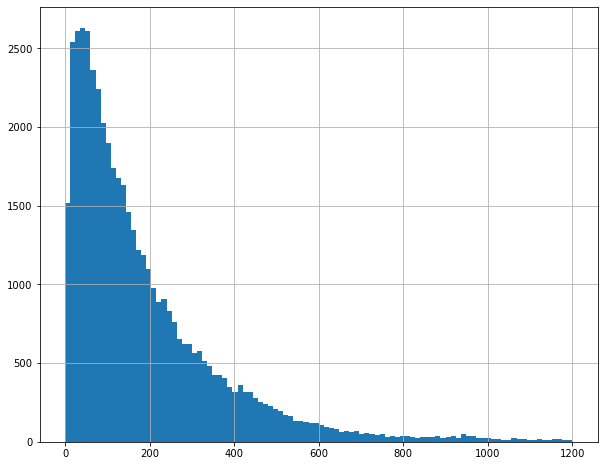

In [70]:
data_forplot = data_final[data_final['Complaint Type']=='Noise - Street/Sidewalk']['Request_Closing_Mins']
plt.figure(figsize=(10,8))
data_forplot.hist(bins=100,range=(0,1200))

In [52]:
data_forplot.describe()

count    47747.000000
mean       206.536842
std        327.190727
min          2.000000
25%         60.000000
50%        132.000000
75%        258.230000
max      35572.370000
Name: Request_Closing_Mins, dtype: float64

Log transformation removes the skewness from the data

In [53]:
data = {}
for complaint in data_final['Complaint Type'].unique():
    data[complaint] = np.log(data_final[data_final['Complaint Type']==complaint]['Request_Closing_Mins'])

<AxesSubplot:>

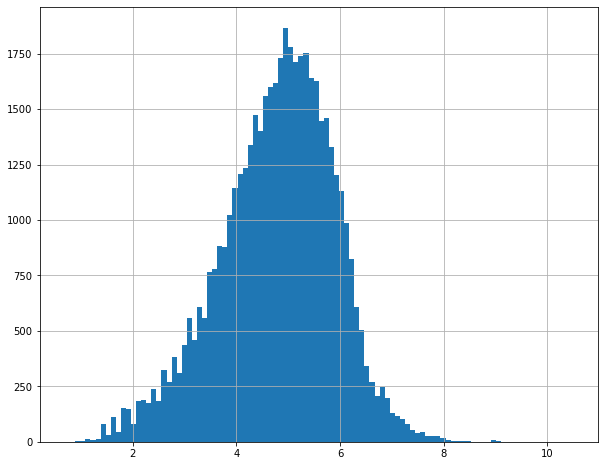

In [71]:
plt.figure(figsize=(10,8))
data['Noise - Street/Sidewalk'].hist(bins=100)

In [55]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

In [56]:
for complaint in data.keys():
    print(data[complaint].std())

1.1029864187328118
0.9759837541444114
1.077592918821144
1.257972806724523
1.0889846540745585
1.1764791170460378
1.2223802306184701
1.0766358890436083
1.043994395205836
1.112433480473147
1.1837653503491075
1.0462788921345112
1.1194432370912575
1.0645054702826866
1.0383279412383348


In [57]:
[complaint for complaint in data.keys()]

['Noise - Street/Sidewalk',
 'Blocked Driveway',
 'Illegal Parking',
 'Derelict Vehicle',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Noise - Vehicle',
 'Animal Abuse',
 'Vending',
 'Traffic',
 'Drinking',
 'Noise - Park',
 'Graffiti',
 'Disorderly Youth']

At the initial stage of analysis, we have determined the top 10 complaints.

Reinforcement on Null Hypothesis and Alternate Hypothesis as below:
- Null Hypothesis: Average response time for all the complaints type is same.

- Alternate Hypothesis: Average response time for all the complaints type is not same.

Conditions: 

- For a 95% of confidence interval we choose our alpha as 0.05 for 5%
- Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.

**if p < alpha(0.05)** : Reject Null Hypothesis, Average response time for all the complaints type is not same.

**if p > alpha(0.05)** : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.

In [58]:
from scipy.stats import f_oneway

In [59]:
stat, p = f_oneway(data['Blocked Driveway'],data['Illegal Parking'],data['Noise - Street/Sidewalk'],data['Noise - Commercial'],data['Derelict Vehicle'])
print('Statistics=%.2f, p=%.2f' % (stat, p))

Statistics=2452.47, p=0.00


**A p-value simply tells you the strength of evidence in support of a null hypothesis. If the p-value is less than the significance level, we reject the null hypothesis, which means , Average response time for all the complaints type is not the same.**

#### 2. Are the type of complaint or service requested and location related?

In [60]:
## We are going to consider the following columns for correlation testing
ds_corr = data_final[['Complaint Type','Borough','City']]

In [61]:
## Changing Categorical values to numbers(One Hot Encoding)
col_oneHot = ds_corr.select_dtypes(include='object').columns.tolist()

col_oneHot
for column in col_oneHot:
    tempdf = pd.get_dummies(ds_corr[column], prefix=column)
    ds_corr= pd.merge(
        left=ds_corr,
        right=tempdf,
        left_index=True,
        right_index=True,
    )

In [62]:
ds_corr = ds_corr.drop((ds_corr.select_dtypes(include='object')).columns.tolist(),axis=1)

In [63]:
ds_corr.corr(method='pearson')

,Complaint Type_Animal Abuse,Complaint Type_Blocked Driveway,Complaint Type_Derelict Vehicle,Complaint Type_Disorderly Youth,Complaint Type_Drinking,Complaint Type_Graffiti,Complaint Type_Illegal Parking,Complaint Type_Noise - Commercial,Complaint Type_Noise - House of Worship,Complaint Type_Noise - Park,Complaint Type_Noise - Street/Sidewalk,Complaint Type_Noise - Vehicle,Complaint Type_Posting Advertisement,Complaint Type_Traffic,Complaint Type_Vending,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,City_ARVERNE,City_ASTORIA,City_BAYSIDE,City_BELLEROSE,City_BREEZY POINT,City_BRONX,City_BROOKLYN,City_CAMBRIA HEIGHTS,City_CENTRAL PARK,City_COLLEGE POINT,City_CORONA,City_EAST ELMHURST,City_ELMHURST,City_FAR ROCKAWAY,City_FLORAL PARK,City_FLUSHING,City_FOREST HILLS,City_FRESH MEADOWS,City_GLEN OAKS,City_HOLLIS,City_HOWARD BEACH,City_JACKSON HEIGHTS,City_JAMAICA,City_KEW GARDENS,City_LITTLE NECK,City_LONG ISLAND CITY,City_MASPETH,City_MIDDLE VILLAGE,City_NEW HYDE PARK,City_NEW YORK,City_OAKLAND GARDENS,City_OZONE PARK,City_QUEENS,City_QUEENS VILLAGE,City_REGO PARK,City_RICHMOND HILL,City_RIDGEWOOD,City_ROCKAWAY PARK,City_ROSEDALE,City_SAINT ALBANS,City_SOUTH OZONE PARK,City_SOUTH RICHMOND HILL,City_SPRINGFIELD GARDENS,City_STATEN ISLAND,City_SUNNYSIDE,City_WHITESTONE,City_WOODHAVEN,City_WOODSIDE
Complaint Type_Animal Abuse,1.000000,-0.098855,-0.041816,-0.005175,-0.010943,-0.003258,-0.096532,-0.061256,-0.009308,-0.019331,-0.073225,-0.040999,-0.007802,-0.020635,-0.018944,0.021168,-0.008454,-0.007256,-0.011896,0.024730,0.025446,-0.008437,0.001559,-0.001690,0.002528,0.021169,-0.008454,-0.000812,-0.003018,-0.001439,-0.009320,-0.003060,-0.007183,0.019649,-0.001910,-0.002326,0.000277,-0.001376,-0.002040,0.002356,0.002079,-0.000693,0.005331,-0.000542,0.000076,-0.008632,-0.006793,-0.006829,-0.001827,-0.007125,0.002208,-0.005468,-0.001621,0.005037,-0.003993,-0.004712,-0.003134,0.004401,0.003326,0.003234,-0.000644,-0.010442,0.000324,0.024723,0.007006,-0.000376,-0.004704,-0.005228
Complaint Type_Blocked Driveway,-0.098855,1.000000,-0.151259,-0.018720,-0.039583,-0.011784,-0.349179,-0.221576,-0.033670,-0.069926,-0.264871,-0.148304,-0.028222,-0.074641,-0.068523,0.048526,0.043151,-0.272041,0.185412,-0.041816,-0.006148,0.045819,0.006806,-0.000481,-0.003766,0.048533,0.043151,0.004452,-0.010917,0.013750,0.106295,0.055493,0.062287,-0.002760,-0.006840,0.068191,0.023555,0.000509,-0.012090,0.010425,-0.010528,0.013200,0.046863,0.017088,-0.004631,0.011438,0.007520,-0.000635,0.011045,-0.271706,-0.002129,0.043357,-0.004274,0.011384,0.024364,0.037122,0.020305,-0.019291,-0.004112,0.003917,0.033744,0.066026,0.004653,-0.041833,0.003090,-0.010187,0.035375,0.047221
Complaint Type_Derelict Vehicle,-0.041816,-0.151259,1.000000,-0.007919,-0.016744,-0.004985,-0.147705,-0.093728,-0.014243,-0.029579,-0.112043,-0.062734,-0.011938,-0.031574,-0.028986,-0.019702,-0.020259,-0.112929,0.107020,0.074088,0.007533,-0.005307,0.028026,0.027132,0.001702,-0.019699,-0.020259,0.031161,-0.004618,0.024840,-0.023989,-0.007582,-0.012200,0.026814,0.029639,0.008524,-0.009133,0.031803,0.013743,0.020514,0.021229,-0.013673,0.048781,-0.009011,0.009066,0.007010,0.045278,0.035466,0.006547,-0.112787,0.017755,0.038304,-0.001008,0.048542,-0.001794,0.009752,0.002402,-0.010166,0.039563,0.041420,0.038312,0.018356,0.041435,0.074073,-0.009556,0.038101,0.025442,0.004141
Complaint Type_Disorderly Youth,-0.005175,-0.018720,-0.007919,1.000000,-0.002072,-0.000617,-0.018280,-0.011600,-0.001763,-0.003661,-0.013866,-0.007764,-0.001477,-0.003908,-0.003587,0.007521,-0.005321,0.001950,-0.004707,0.006053,0.007256,-0.002747,-0.000321,0.005059,-0.000318,0.007521,-0.005321,-0.001260,-0.000572,-0.000324,0.001668,-0.001912,-0.000661,-0.000241,0.004093,-0.002952,-0.000906,-0.002528,-0.001012,0.000043,0.000190,-0.002379,0.000706,-0.001605,0.003651,-0.001758,-0.000474,-0.002441,-0.000569,0.001977,0.001182,0.001508,-0.000307,-0.002461,-0.002236,-0.002514,-0.001684,0.007159,-0.001756,0.0

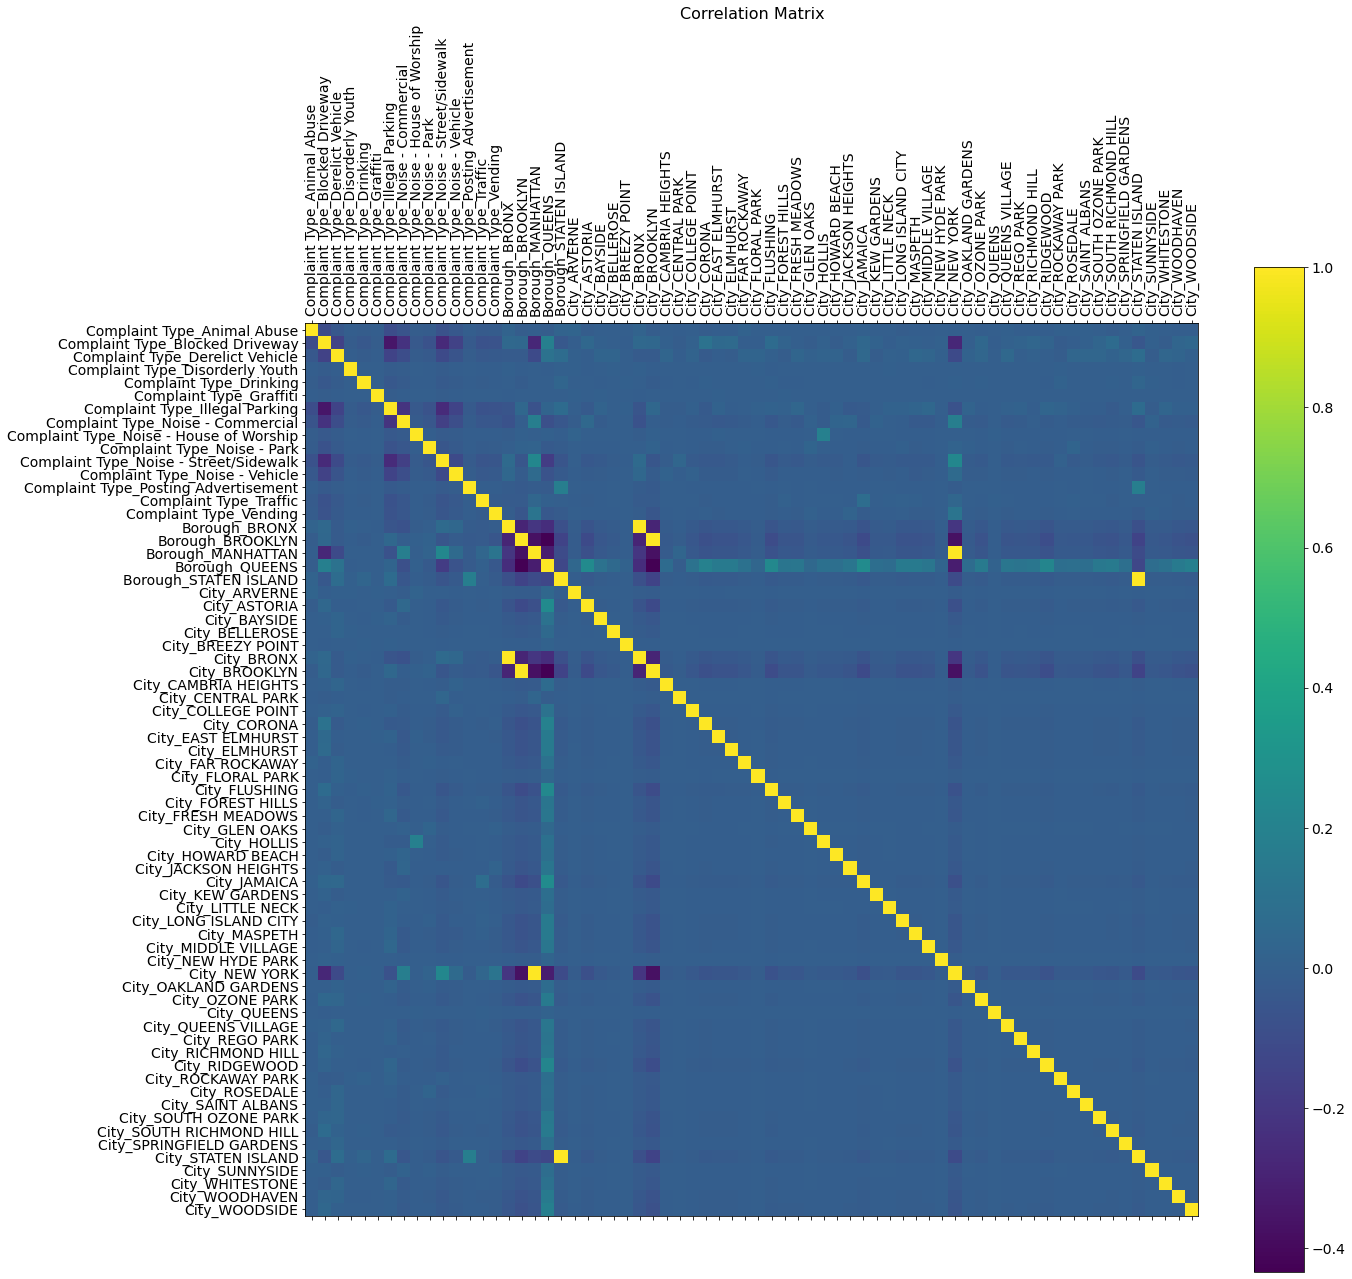

In [74]:
# Below figure is a representation of the result above:

f=plt.figure(figsize=(20, 18))
plt.matshow(ds_corr.corr(), fignum=f.number)
plt.xticks(range(ds_corr.select_dtypes(['number']).shape[1]), ds_corr.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(ds_corr.select_dtypes(['number']).shape[1]), ds_corr.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

**Degree of correlation:**

- **Perfect:** If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
- **High degree:** If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
- **Moderate degree:** If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
- **Low degree:** When the value lies below + .29, then it is said to be a small correlation.
- **No correlation:** When the value is zero.

We can safely conclude that there is no correlation between location and type of complain